# K-Nearest Neighbours

## 1. Background

k-nearest neighbors (k-NN) is a non-parametric method used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

<ul style="list-style-type:square">
 <li>In k-NN classification, the output is a class membership. An object is classified by a <b>majority vote</b> of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. </li>  
<li>In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors. </li>
</ul>

Both for classification and regression, it can be useful to assign <strong>weight</strong> to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. For example, a common weighting scheme consists in giving each neighbor a weight of 1/d, where d is the distance to the neighbor.

A number of algorithms exist for k-NN estimation including Brute force, K-D Tree, and Ball Tree.

Extracted from the wikipedia article for [k-NN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

Description also available from [scikit learn](http://scikit-learn.org/stable/modules/neighbors.html#neighbors).

## 2. Simple Classification Example

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

The example below uses k-NN to classify the `iris` dataset using a uniform and a distance weighting.

Inspired by this [example](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html).

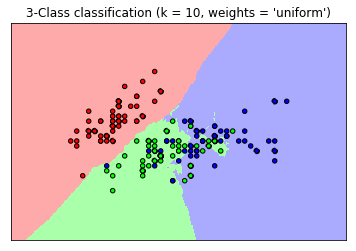

Accuracy: 0.833333333333 



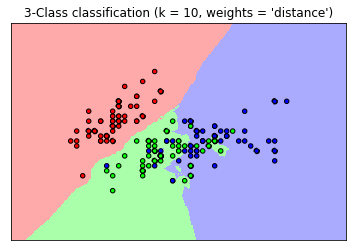

Accuracy: 0.733333333333 



In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 10

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# samples are ordered so we need to randomize order so we don't pick/exclude samples from only one class
n_sample = len(X)
np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

# use 90/10 % split for training and testing, int(.9 * n_sample) makes sure to take an integer split.
X_train, y_train = X[:int(.8 * n_sample)], y[:int(.8 * n_sample)]
X_test, y_test = X[int(.8 * n_sample):], y[int(.8 * n_sample):]

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = .02  # step size in the mesh

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolors='k', cmap=cmap_bold)
    # Plot Circle out test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=30, edgecolors='k', linestyles=['--'], facecolors='none', zorder=10)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))

    plt.xticks(())
    plt.yticks(())
    plt.show()
    #print("Predicted values: \n",clf.predict(X_test))
    #print("Ground truth: \n",y_test)
    print("Accuracy:",sum(clf.predict(X_test)==y_test)/len(y_test),"\n")

## 3. k-Neighbors-based Regression

Neighbors-based regression can be used in cases where the data labels are continuous rather than discrete variables.
The label assigned to a query point is computed based the mean of the labels of its nearest neighbors.

The basic nearest neighbors regression uses uniform weights: that is, each point in the local neighborhood contributes uniformly to the classification of a query point. Under some circumstances, it can be advantageous to weight points such that nearby points contribute more to the regression than faraway points. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns equal weights to all points. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied, which will be used to compute the weights.

The example below uses uniform and distance weighted k-neighbours regression to estimate values.

Inspired by [this example](http://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html).

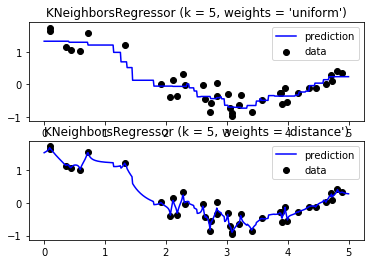

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1)) # create 40 random points and scale by 5 and sort them.
T = np.linspace(0, 5, 500)[:, np.newaxis] # split [0,5] into 500 intervals then put into single elements array
y = np.cos(X).ravel()+np.random.rand(40) # Create a target by taking the sine of X and adding some noise.

n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='b', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))
plt.show()